<a href="https://colab.research.google.com/github/Nayoung-young/prj-ecommerce-eda/blob/main/User_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 유저 성과 분석 (4번)

In [74]:
# 라이브러리 임포트

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# _1. 데이터 전처리

## 1.1. 데이터셋 불러오기

In [164]:
%%time
df_re_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_order_reviews_dataset.csv')

df_customer_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_customers_dataset.csv')
df_ord_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_orders_dataset.csv')
df_it_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_order_items_dataset.csv')

df_prod_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_products_dataset.csv')
df_seller_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_sellers_dataset.csv')

CPU times: user 1.68 s, sys: 157 ms, total: 1.84 s
Wall time: 2.5 s


In [76]:
df_re_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [77]:
df_customer_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [78]:
df_ord_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [79]:
# df_ord_org[['order_approved_at', 'order_delivered_carrier_date']].isna().sum()

In [80]:
# df_ord_org[ df_ord_org[['order_approved_at', 'order_delivered_carrier_date']].isna() ]

In [81]:
df_it_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


## 1.2. 전처리

In [82]:
# df_ord 전처리

df_ord = df_ord_org.copy()

print('='* 50 +'\n')
print('df_ord\n')
print(f'전처리 전: {df_ord.shape}')

## 1) 필요한 컬럼만 남기기

df_ord = df_ord_org[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']]

## 2) order_status == 'delivered'

df_ord = df_ord[ df_ord['order_status'] == 'delivered' ]

## 3) order_purchase_year, month 추가

df_ord['order_purchase_timestamp'] = pd.to_datetime(df_ord['order_purchase_timestamp'])

df_ord['order_purchase_date'] = df_ord['order_purchase_timestamp'].dt.date
df_ord['order_purchase_year'] = df_ord['order_purchase_timestamp'].dt.year
df_ord['order_purchase_month'] = df_ord['order_purchase_timestamp'].dt.month


# df_ord.drop(columns = ['order_purchase_timestamp'], inplace=True)

## 4) order_purchase_year == 2017 만 포함

df_ord = df_ord[ df_ord['order_purchase_year'] == 2017 ]

print(f'전처리 후: {df_ord.shape}\n')
print('='* 50 +'\n')

print(df_ord.info())


df_ord

전처리 전: (99441, 8)
전처리 후: (43428, 7)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 99438
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  43428 non-null  object        
 1   customer_id               43428 non-null  object        
 2   order_status              43428 non-null  object        
 3   order_purchase_timestamp  43428 non-null  datetime64[ns]
 4   order_purchase_date       43428 non-null  object        
 5   order_purchase_year       43428 non-null  int64         
 6   order_purchase_month      43428 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.7+ MB
None


In [83]:
df_ord['order_purchase_date'].max()

datetime.date(2017, 12, 31)

In [84]:
df_ord['order_purchase_date'].max()

datetime.date(2017, 12, 31)

In [85]:
df_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_purchase_date,order_purchase_year,order_purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017,10
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18,2017,11
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09,2017,7
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16,2017,5
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-23,2017,1


In [86]:
# df_re 전처리

df_re = df_re_org.copy()

print('='* 50 +'\n')
print('df_re\n')
print(f'전처리 전: {df_re.shape}')

## 1) 필요한 컬럼만 남기기

df_re = df_re_org[['review_id', 'order_id', 'review_score']]

print(f'전처리 후: {df_re.shape}\n')
print('='* 50 +'\n')

print(df_re.info())



df_re

전처리 전: (99224, 7)
전처리 후: (99224, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB
None


In [87]:
# df_customer 전처리

df_customer = df_customer_org.copy()

print('='* 50 +'\n')
print('df_customer\n')
print(f'전처리 전: {df_customer.shape}')

## 1) 필요한 컬럼만 남기기

df_customer = df_customer_org[['customer_id', 'customer_unique_id', 'customer_state']]

print(f'전처리 후: {df_customer.shape}\n')
print('='* 50 +'\n')

print(df_customer.info())



df_customer

전처리 전: (99441, 5)
전처리 후: (99441, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_state      99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB
None


In [88]:
# df_it 전처리

df_it = df_it_org.copy()

print('='* 50 +'\n')
print('df_it\n')
print(f'전처리 전: {df_it.shape}')

## 1) 필요한 컬럼만 남기기

df_it = df_it_org[['order_id', 'order_item_id', 'product_id', 'seller_id', 'price']]

print(f'전처리 후: {df_it.shape}\n')
print('='* 50 +'\n')

print(df_it.info())



df_it

전처리 전: (112650, 7)
전처리 후: (112650, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.3+ MB
None


#_2. 시각화

## 2.1. 어떤 유저가 2017년에 가장 많이 구매했는가? (VIP 리스트)

> 목적: VIP 유저 리스트 추출하기

* 리스트 출력:
  * customer_unique_id | 2017년 총 상품 구매 금액 | 2017년 첫 상품 구매 | 2017년 마지막 구매 | 2017년 구매 빈도 수

* 시각화:  
  * 구매 금액별 유저 count? (히스토그램)
  * 구매 금액 x 축 / 구매 빈도 수 y 축 : 유저 클러스터링

### 2.1.1 데이터 준비 (merge)
- orders(order_id, order_purchase_year, month, day)  - customers(customer_unique_id) - order_items (price)

In [89]:
# df_ord.info()

In [90]:
# df_ord와 df_customer customer_id 기준 inner join

print('='* 50 +'\n')
print(f'merge 전 - df_ord: {df_ord.shape}')
print(f'merge 전 - df_customer: {df_customer.shape}\n')

print('='* 50 +'\n')

df_ord_customer = pd.merge(df_ord, df_customer, on ='customer_id', how ='inner') # 주문 내역이 있는 customer만 남음

print(f'merge 후 - df_ord_customer: {df_ord_customer.shape}\n')

df_ord_customer.info()



merge 전 - df_ord: (43428, 7)
merge 전 - df_customer: (99441, 3)


merge 후 - df_ord_customer: (43428, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 43427
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  43428 non-null  object        
 1   customer_id               43428 non-null  object        
 2   order_status              43428 non-null  object        
 3   order_purchase_timestamp  43428 non-null  datetime64[ns]
 4   order_purchase_date       43428 non-null  object        
 5   order_purchase_year       43428 non-null  int64         
 6   order_purchase_month      43428 non-null  int64         
 7   customer_unique_id        43428 non-null  object        
 8   customer_state            43428 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 3.3+ MB


In [91]:
# df_ord_customer와 df_it를 order_id 기준 inner join

print('='* 50 +'\n')
print(f'merge 전 - df_ord_customer: {df_ord_customer.shape}')
print(f'merge 전 - df_it: {df_it.shape}\n')

print('='* 50 +'\n')

df_ord_customer_it = pd.merge(df_ord_customer, df_it, on ='order_id', how ='inner')

print(f'merge 후 - df_ord_customer_it: {df_ord_customer_it.shape}\n')

df_ord_customer_it.info()



merge 전 - df_ord_customer: (43428, 9)
merge 전 - df_it: (112650, 5)


merge 후 - df_ord_customer_it: (49556, 13)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49556 entries, 0 to 49555
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  49556 non-null  object        
 1   customer_id               49556 non-null  object        
 2   order_status              49556 non-null  object        
 3   order_purchase_timestamp  49556 non-null  datetime64[ns]
 4   order_purchase_date       49556 non-null  object        
 5   order_purchase_year       49556 non-null  int64         
 6   order_purchase_month      49556 non-null  int64         
 7   customer_unique_id        49556 non-null  object        
 8   customer_state            49556 non-null  object        
 9   order_item_id             49556 non-null  int64         
 10  product_id                495

In [92]:
df_ord_customer_it[['order_id', 'order_item_id']].nunique()

order_id         43428
order_item_id       21
dtype: int64

In [93]:
# 필요한 컬럼만 추출하기

df_ord_customer_it = df_ord_customer_it[['order_id', 'customer_unique_id', 'order_item_id', 'price','order_purchase_date', 'order_purchase_year', 'customer_state']]
df_ord_customer_it.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49556 entries, 0 to 49555
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             49556 non-null  object 
 1   customer_unique_id   49556 non-null  object 
 2   order_item_id        49556 non-null  int64  
 3   price                49556 non-null  float64
 4   order_purchase_date  49556 non-null  object 
 5   order_purchase_year  49556 non-null  int64  
 6   customer_state       49556 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.0+ MB


In [94]:
df_ord_customer_it.head() # 이 상태에서 customer_unique_id 기준으로 집계 예정

,order_id,customer_unique_id,order_item_id,price,order_purchase_date,order_purchase_year,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,1,29.99,2017-10-02,2017,SP
1,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,1,45.00,2017-11-18,2017,RN
2,a4591c265e18cb1dcee52889e2d8acc3,80bb27c7c16e8f973207a5086ab329e2,1,147.90,2017-07-09,2017,PR
3,6514b8ad8028c9f2cc2374ded245783f,932afa1e708222e5821dac9cd5db4cae,1,59.99,2017-05-16,2017,RJ
4,76c6e866289321a7c93b82b54852dc33,39382392765b6dc74812866ee5ee92a7,1,19.90,2017-01-23,2017,RS


### 2.2.2 집계 (df 가공)
* 리스트 출력:
  * customer_unique_id | 2018년 총 상품 구매 금액 | 2018년 첫 상품 구매 | 2018년 마지막 구매 | 2018년 구매 빈도 수

In [95]:
df_ord_customer_it.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49556 entries, 0 to 49555
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             49556 non-null  object 
 1   customer_unique_id   49556 non-null  object 
 2   order_item_id        49556 non-null  int64  
 3   price                49556 non-null  float64
 4   order_purchase_date  49556 non-null  object 
 5   order_purchase_year  49556 non-null  int64  
 6   customer_state       49556 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.0+ MB


In [96]:
df_ord_customer_it[ df_ord_customer_it['customer_unique_id'] == '763c8b1c9c68a0229c42c9fc6f662b93' ]

,order_id,customer_unique_id,order_item_id,price,order_purchase_date,order_purchase_year,customer_state


In [97]:
# 2017년 VIP 고객
%%time
df_vip_2017 = df_ord_customer_it[ df_ord_customer_it['order_purchase_year']  == 2017 ]
df_vip_2017 = df_vip_2017.groupby(['customer_unique_id']).agg(order_purchase_sum_2017 = ('price', 'sum'),
                                                order_purchase_date_min = ('order_purchase_date', 'min'),
                                                order_purchase_date_max = ('order_purchase_date', 'max'),
                                                order_frequency = ('order_id','nunique'),
                                                customer_state = ('customer_state', 'max'))\
                                                .reset_index().sort_values(by='order_purchase_sum_2017', ascending = False)

df_vip_2017.head(20)

CPU times: user 12.6 s, sys: 30.5 ms, total: 12.6 s
Wall time: 12.8 s


,customer_unique_id,order_purchase_sum_2017,order_purchase_date_min,order_purchase_date_max,order_frequency,customer_state
1690,0a0a92112bd4c708ca5fde585afaa872,13440.00,2017-09-29,2017-09-29,1,RJ
35983,da122df9eeddfedc1dc1f5349a1a690c,7388.00,2017-04-01,2017-04-01,2,RJ
36349,dc4802a71eae9be1dd28f5d788ceb526,6735.00,2017-02-12,2017-02-12,1,MS
42003,ff4159b92c40ebe40454e3e6a7c35ed6,6499.00,2017-05-24,2017-05-24,1,SP
10550,4007669dec559734d6f53e029e360987,5934.60,2017-11-24,2017-11-24,1,MG
39335,eebb5dda148d3893cdaf5b5ca3040ccb,4690.00,2017-04-18,2017-04-18,1,SP
181,011875f0176909c5cf0b14a9138bb691,3999.90,2017-03-18,2017-03-18,1,SP
39211,edf81e1f3070b9dac83ec83dacdbb9bc,3999.00,2017-04-18,2017-04-18,1,DF
15632,5e713be0853d8986528d7869a0811d2b,3980.00,2017-02-04,2017-02-04,1,PA
15387,5d09b0d82126457e2a8ebfb9c9a1ffc4,3699.99,2017-02-10,2017-02-10,1,DF


In [98]:
# 2017년 고객 중 order_frequency > 1

df_vip_2017[df_vip_2017['order_frequency'] > 1].sort_values(by= 'order_purchase_sum_2017', ascending = False).head(10)

,customer_unique_id,order_purchase_sum_2017,order_purchase_date_min,order_purchase_date_max,order_frequency,customer_state
35983,da122df9eeddfedc1dc1f5349a1a690c,7388.00,2017-04-01,2017-04-01,2,RJ
14874,59d66d72939bc9497e19d89c61a96d5f,3459.00,2017-03-02,2017-08-10,2,SP
35564,d77aa95864ae5b42160937615628723a,2400.00,2017-08-29,2017-08-29,2,BA
22200,86df00dc5fd68f4dd5d5945ca19f3ed6,2200.00,2017-06-08,2017-10-13,3,RS
19030,73601b1eec55943e90ce8d61253d5c09,2009.98,2017-09-26,2017-11-01,2,MG
20052,798c34ffa9047399853eab8ca7c0b9a0,1770.30,2017-12-04,2017-12-04,2,MG
34097,cef29e793e232d30250331804cdb7000,1669.12,2017-03-09,2017-05-26,2,MG
26467,a1044dd75b74fbc485b040575a14acf0,1663.00,2017-12-12,2017-12-20,2,SP
31868,c169c9937db997a267f749cdd64c161f,1511.20,2017-05-09,2017-05-09,2,PR
35992,da1e7179b9c5a1494d78528cbcf05aa0,1399.90,2017-05-19,2017-11-09,2,SC


In [110]:
# 구매 평균 금액
df_vip_2017['average_purchase_price'] = df_vip_2017['order_purchase_sum_2017']/df_vip_2017['order_frequency']

In [99]:
# df_q01 = df_base.groupby('q01').agg(cnts = ('user_id', 'count')).reset_index()
# df_q01.sort_values(by = 'cnts', ascending = False, inplace = True)

### 2.2.3 [진행중] 시각화

<timed exec>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


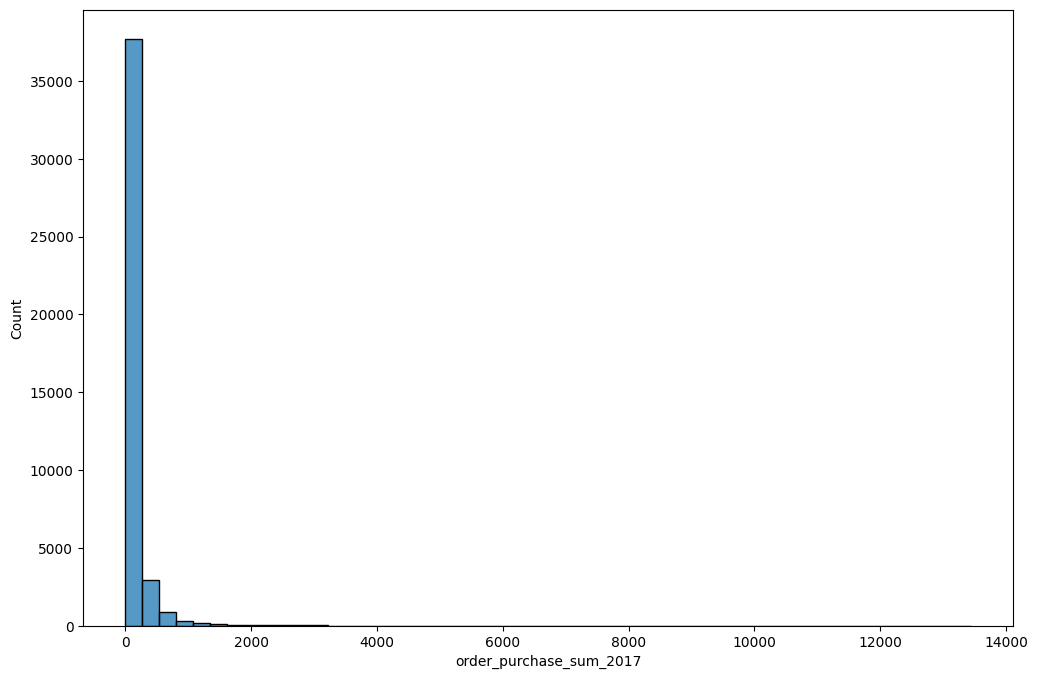

CPU times: user 402 ms, sys: 45.5 ms, total: 447 ms
Wall time: 481 ms


In [171]:
%%time
plt.figure(figsize = (12, 8))

# sns.histplot(data = df_vip_2017, x ='order_purchase_sum_2017', kde=True, bins=30, palette='Set2')
sns.histplot(data = df_vip_2017, x ='order_purchase_sum_2017', bins=50, palette='Set2')

plt.title('')
plt.show()

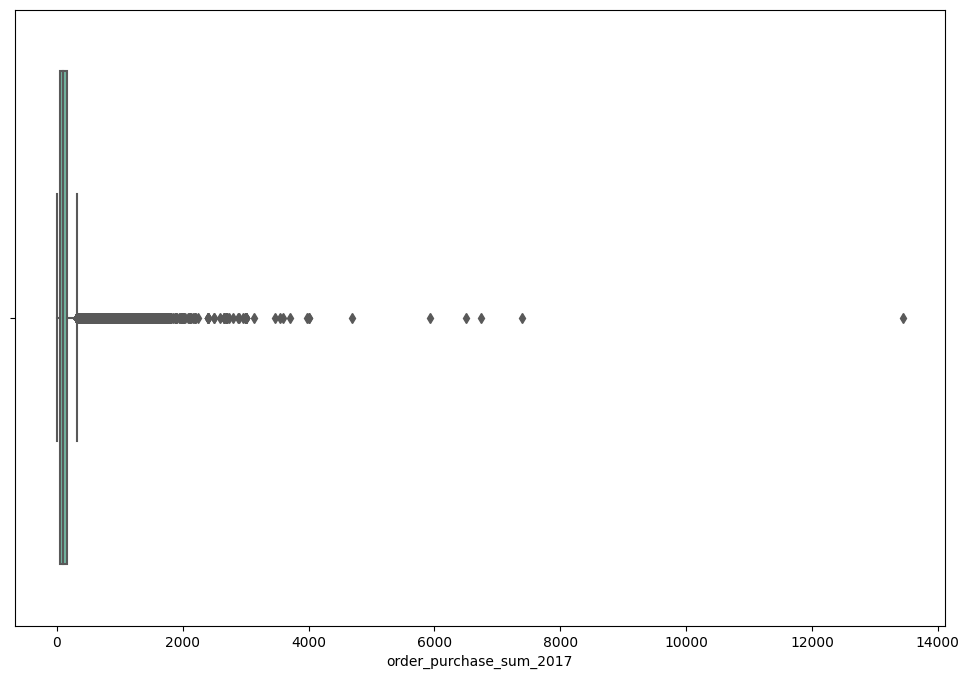

CPU times: user 240 ms, sys: 50 ms, total: 290 ms
Wall time: 300 ms


In [170]:
%%time
plt.figure(figsize = (12, 8))

# sns.histplot(data = df_vip_2017, x ='order_purchase_sum_2017', kde=True)
sns.boxplot(data = df_vip_2017, x ='order_purchase_sum_2017', palette='Set2')

plt.title('')
plt.show()

In [155]:
# outlier 기준: Q3 + 1.5 IQR

Q3 = df_vip_2017.order_purchase_sum_2017.quantile(q= 0.75) # 154.9
Q1 = df_vip_2017.order_purchase_sum_2017.quantile(q= 0.25) # 47.98
IQR = Q3-Q1

outlier_border = Q3 + 1.5 * IQR

print(f'기존 dataset shape: {df_vip_2017.shape}')
outliers = df_vip_2017[ df_vip_2017['order_purchase_sum_2017'] >= outlier_border ]

print(f'아웃라이어에 해당하는 데이터 shape: {outliers.shape}, 전체의 {round(outliers.shape[0]/df_vip_2017.shape[0]*100, 2)}%')


기존 dataset shape: (42136, 7)
아웃라이어에 해당하는 데이터 shape: (3501, 7), 전체의 8.31%


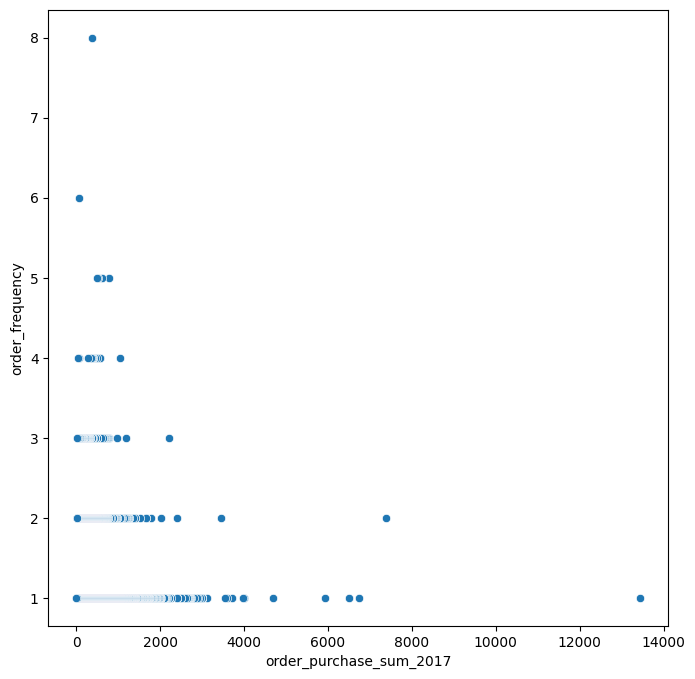

CPU times: user 417 ms, sys: 48.3 ms, total: 465 ms
Wall time: 446 ms


In [113]:
%%time
plt.figure(figsize = (8, 8))

sns.scatterplot(data = df_vip_2017, x ='order_purchase_sum_2017', y ='order_frequency') #hue = 'customer_state')
# sns.scatterplot(data = df_vip_2017, x ='order_purchase_sum_2017', y ='average_purchase_price') #hue = 'customer_state')

# 이 상태로는 클러스터링 어려움 (order_frequency가 정수형이라서)
## order_frequency = 1 인 경우가 가장 많음

plt.title('')
plt.show()

## 2.2. [진행중] 구입금액 top 100 유저 분석

### 2.2.1. 데이터 준비 (슬라이싱)

In [104]:
vip_100 = df_vip_2017.head(100)
vip_100.head(5)

,customer_unique_id,order_purchase_sum_2017,order_purchase_date_min,order_purchase_date_max,order_frequency,customer_state
1690,0a0a92112bd4c708ca5fde585afaa872,13440.0,2017-09-29,2017-09-29,1,RJ
35983,da122df9eeddfedc1dc1f5349a1a690c,7388.0,2017-04-01,2017-04-01,2,RJ
36349,dc4802a71eae9be1dd28f5d788ceb526,6735.0,2017-02-12,2017-02-12,1,MS
42003,ff4159b92c40ebe40454e3e6a7c35ed6,6499.0,2017-05-24,2017-05-24,1,SP
10550,4007669dec559734d6f53e029e360987,5934.6,2017-11-24,2017-11-24,1,MG


### 2.2.2. 시각화

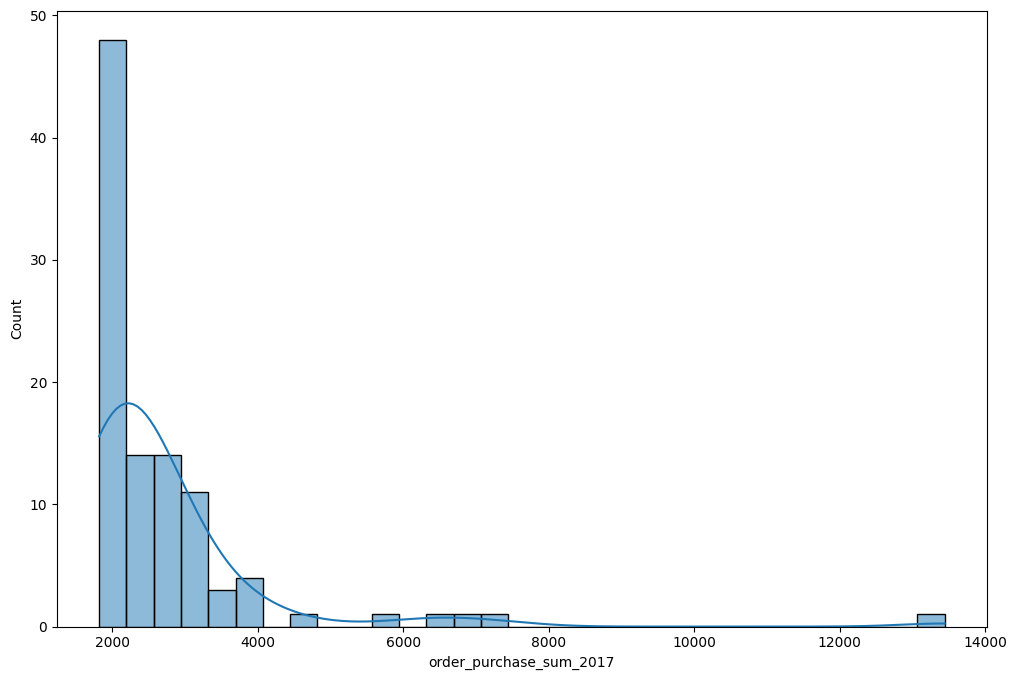

CPU times: user 366 ms, sys: 96.2 ms, total: 462 ms
Wall time: 454 ms


In [142]:
%%time
# (확인용) 상위 100명 고객만 2017년 구입금액 histplot

plt.figure(figsize = (12, 8))

sns.histplot(data = vip_100, x ='order_purchase_sum_2017', kde=True)
# sns.boxplot(data = vip_100, x ='order_purchase_sum_2017', palette='Set2')

# plt.xlim(1900, 4200)

plt.show()

In [127]:
%%time
# 상위 100명 유저 state 별 집계

# vip_100_state = vip_100.groupby(['customer_state']).agg(top100_customer_cnt = ('customer_unique_id', 'count'))\
# .reset_index().sort_values(by='top100_customer_cnt', ascending = False)

# vip_100_state

vip_100.customer_state.value_counts()

CPU times: user 1.34 ms, sys: 0 ns, total: 1.34 ms
Wall time: 12.9 ms


SP    33
RJ    14
MG    10
RS     7
BA     7
SC     5
PR     4
PE     4
DF     3
MS     2
GO     2
PB     2
PA     1
CE     1
TO     1
RO     1
MT     1
MA     1
AL     1
Name: customer_state, dtype: int64

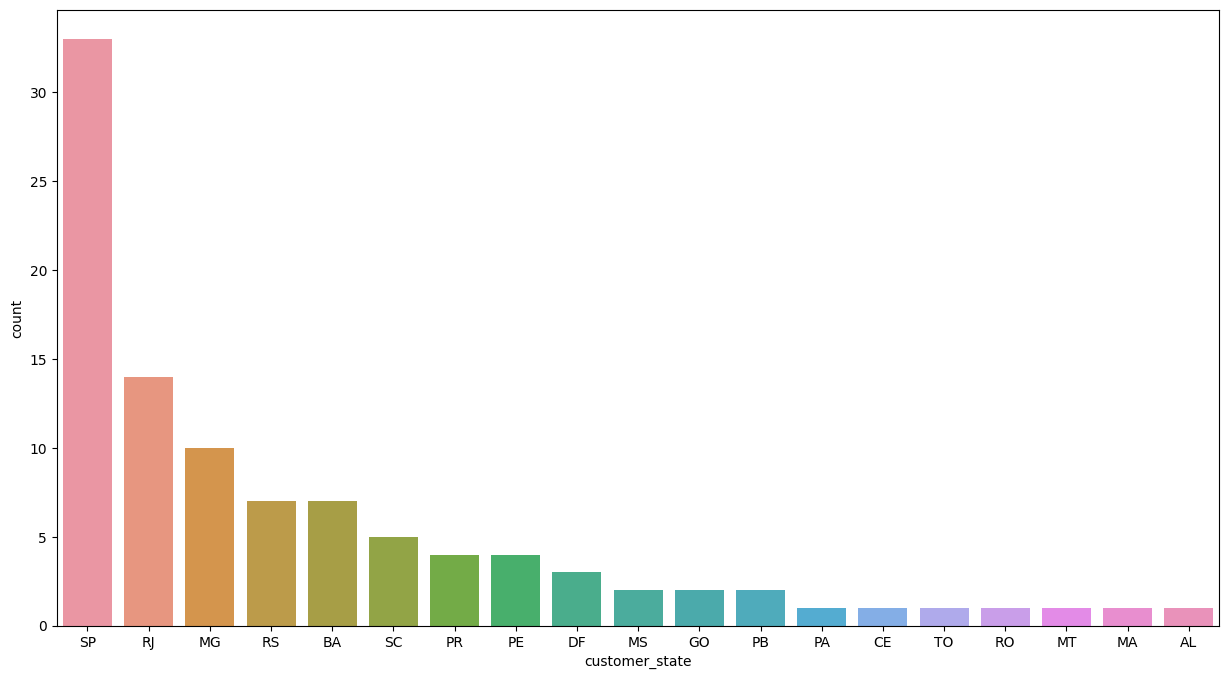

CPU times: user 357 ms, sys: 54.1 ms, total: 411 ms
Wall time: 412 ms


In [129]:
%%time
# 상위 100명 유저 state 별 집계

## 역시 SP에 VIP 유저가 쏠려 있음
## 지도로 표시할 수 있으면 좋을 것 같은데

plt.figure(figsize = (15,8))

sns.countplot(data = vip_100, x ='customer_state', order = vip_100.customer_state.value_counts().index)
# 버블 차트??? <- 찾아보기

plt.show()

## 2.3. [진행중] 1번 구매 고객 vs 재구매고객

- 1번 구매 고객 vs 재구매 고객
  - 재구매가 '언제' 발생했는가? x축: 월, y축: order count
  - 재구매가 '어떤 카테고리'에서 발생했는가? x축: 카테고리, y축: order count

### 2.3.1. 데이터 준비 (필터링)

In [131]:
df_vip_2017.head()

,customer_unique_id,order_purchase_sum_2017,order_purchase_date_min,order_purchase_date_max,order_frequency,customer_state,average_purchase_price
1690,0a0a92112bd4c708ca5fde585afaa872,13440.0,2017-09-29,2017-09-29,1,RJ,13440.0
35983,da122df9eeddfedc1dc1f5349a1a690c,7388.0,2017-04-01,2017-04-01,2,RJ,3694.0
36349,dc4802a71eae9be1dd28f5d788ceb526,6735.0,2017-02-12,2017-02-12,1,MS,6735.0
42003,ff4159b92c40ebe40454e3e6a7c35ed6,6499.0,2017-05-24,2017-05-24,1,SP,6499.0
10550,4007669dec559734d6f53e029e360987,5934.6,2017-11-24,2017-11-24,1,MG,5934.6


In [159]:
df_customers_new = df_vip_2017[ df_vip_2017['order_frequency'] == 1 ]
print(f'1번 구매한 고객 : df_customers_new, {df_customers_new.shape}')

df_customers_repurchase = df_vip_2017[ df_vip_2017['order_frequency'] > 1 ]
print(f'2번 이상 구매한 고객 : df_customers_repurchase, {df_customers_repurchase.shape}')

1번 구매한 고객 리스트: df_customers_new, (40966, 7)
2번 이상 구매한 고객 리스트: df_customers_repurchase, (1170, 7)


### 2.3.2. 시각화

In [160]:
# 구매 빈도 수 value_counts
df_vip_2017.order_frequency.value_counts()

1    40966
2     1077
3       74
4       13
5        4
8        1
6        1
Name: order_frequency, dtype: int64

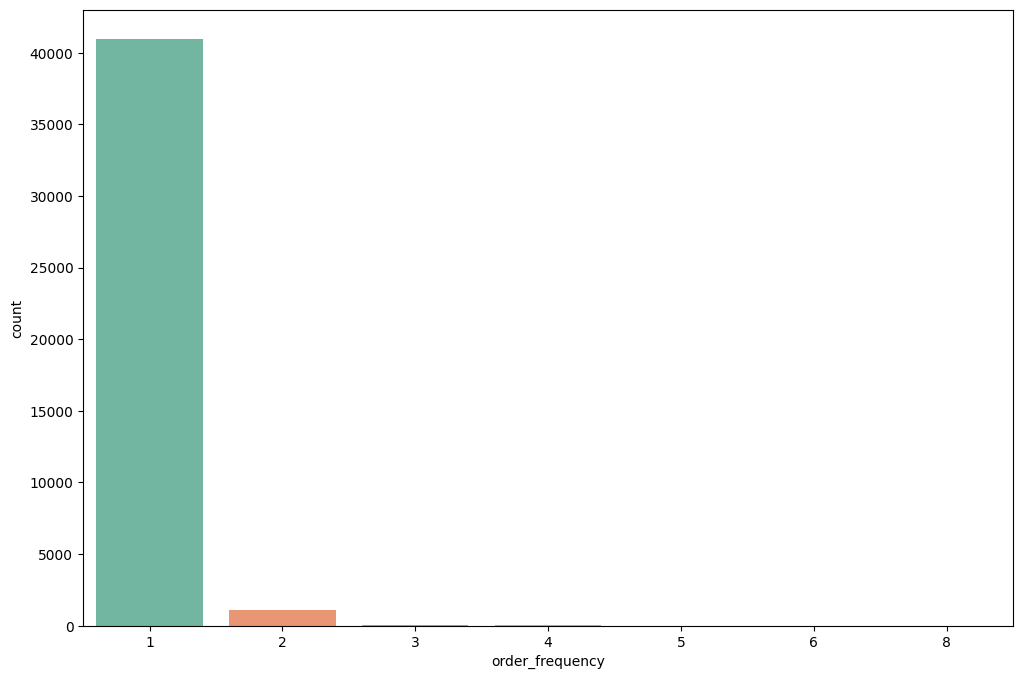

In [141]:
# 구매 빈도 수 barplot (확인용)

plt.figure(figsize = (12, 8))

sns.countplot(data = df_vip_2017, x ='order_frequency', palette = 'Set2')
plt.show()

In [163]:
## 2번 이상 구매한 고객은 어떤 카테고리를 구매한 걸까? 그 구매 카테고리 간 공통점이 있을까?

# 가설: 2번 이상 구매한 고객은 소모품을 구매했을 것이다

customer_repurchase_ids = df_customers_repurchase.customer_unique_id.tolist()

# df_ord_customer_it, df_prod 와 join 필요

## 2.4. 세그멘테이션

# _3. 결론